In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
import matplotlib.pyplot as plt
from pocket_coffea.lib.deltaR_matching import object_matching, deltaR_matching_nonunique
import vector
import math
import numpy as np
vector.register_awkward()

In [2]:
filename = "root://xrootd-cms.infn.it//store/mc/Run3Summer22NanoAODv12/QCD_PT-15_TuneCP5_Flat2018_13p6TeV_pythia8/NANOAODSIM/JMENano12p5_132X_mcRun3_2022_realistic_v3-v2/70000/1a3d12b4-15b7-415c-a25a-df0e81f71648.root"
events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema, entry_stop=20).events()
print("Events read:", len(events))

Events read: 20


In [3]:
neutrinos=events.GenPart[(abs(events.GenPart.pdgId)==12) | (abs(events.GenPart.pdgId)==14) |(abs(events.GenPart.pdgId)==16)]
gen_jet=events.GenJet
print(neutrinos.phi, neutrinos.eta, neutrinos.pt)
print(gen_jet.px[-3])

[[], [], [], [], [], [], [], [1.62, ... [], [], [], [-0.607, -0.643, -0.758], [], []] [[], [], [], [], [], [], [], [-0.181, ... [], [], [], [-0.235, -0.256, 0.21], [], []] [[], [], [], [], [], [], [], [1.63], ... [], [], [], [], [38.9, 7.27, 9.03], [], []]
[-804, -272, 930, 95.6, -7.48]


In [4]:
neutrinos_matched = deltaR_matching_nonunique(
                    gen_jet, neutrinos, 0.4 # 0.4
                )

In [5]:
print(neutrinos_matched[-3].phi, neutrinos_matched[-3].eta)
print(gen_jet[-3].phi, gen_jet[-3].eta)

[[], [], [-0.607, -0.643, -0.758], [], []] [[], [], [-0.235, -0.256, 0.21], [], []]
[1.7, -1.62, -0.591, 0.259, 1.92] [0.0171, -0.0247, -0.0151, 0.578, 2.06]


In [6]:
print(gen_jet.metric_table(neutrinos)[-3][2])
print(gen_jet.metric_table(neutrinos)[-3])
print(gen_jet[-3][2].hadronFlavour)
neutrino_mother=events.GenPart[neutrinos.genPartIdxMother].pdgId
print(neutrino_mother[-3])
for num, gen_part in enumerate(events.GenPart[-3]):
    print(num, gen_part.pdgId, gen_part.genPartIdxMother)

[0.221, 0.246, 0.281]


[[2.32, 2.36, 2.46], [1.03, 1, 0.893], ... [1.19, 1.23, 1.08], [3.41, 3.45, 3.25]]
5
[-511, 15, -411]
0 1 -1
1 -3 -1
2 1 0
3 -3 0
4 22 2
5 5 2
6 -1 2
7 -511 5
8 1 2
9 21 2
10 -2 2
11 111 8
12 2 2
13 111 2
14 2 2
15 21 2
16 21 2
17 21 2
18 21 2
19 21 2
20 21 2
21 21 2
22 -5 2
23 111 2
24 -5122 2
25 21 2
26 21 3
27 21 3
28 21 3
29 21 3
30 21 3
31 21 3
32 21 3
33 21 3
34 21 3
35 21 3
36 21 3
37 21 3
38 21 3
39 21 3
40 21 3
41 -3 3
42 221 2
43 111 2
44 111 8
45 111 8
46 111 2
47 111 2
48 111 2
49 111 2
50 111 2
51 111 2
52 111 2
53 111 2
54 -16 7
55 15 7
56 22 11
57 22 13
58 111 2
59 22 23
60 111 2
61 413 24
62 -411 24
63 22 42
64 22 42
65 111 2
66 22 43
67 22 43
68 22 44
69 22 44
70 22 45
71 22 45
72 22 46
73 22 46
74 22 47
75 22 47
76 22 48
77 22 49
78 22 49
79 22 50
80 22 50
81 22 51
82 22 51
83 22 52
84 22 52
85 22 53
86 22 53
87 16 55
88 111 55
89 -211 55
90 423 7
91 22 58
92 22 60
93 22 60
94 421 61
95 13 62
96 -14 62
97 22 65
98 22 88
99 22 88
100 421 90
101 22 90


sum the quadrivector of the neutrinos

In [7]:
print(ak.sum(neutrinos.px, axis=-1))
print(neutrinos[7].px)
print(neutrinos[-3].px)
# print(ak.sum(neutrinos, axis=-2))
# print(neutrinos[:,0]+neutrinos[:,1])

[0, 0, 0, 0, 0, 0, 0, -0.0757, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44.3, 0, 0]
[-0.0757]
[31.9, 5.82, 6.56]


In [8]:
neutrinos_px = ak.sum(neutrinos_matched.px, axis=-1)
neutrinos_py = ak.sum(neutrinos_matched.py, axis=-1)
neutrinos_pz = ak.sum(neutrinos_matched.pz, axis=-1)
neutrinos_e = ak.sum(neutrinos_matched.energy, axis=-1)
print(neutrinos_px, len(neutrinos_px), len(neutrinos_px[0]), len(neutrinos_px[1]))

# COMPUTE PT, ETA, PHI, MASS
neutrinos_pt = np.sqrt(neutrinos_px**2 + neutrinos_py**2)
print(neutrinos_pt, len(neutrinos_pt), len(neutrinos_pt[0]), len(neutrinos_pt[1]))
# neutrinos_eta = np.arcsinh(neutrinos_pz/neutrinos_pt)
neutrinos_eta = np.arctanh(neutrinos_pz/np.sqrt(neutrinos_pt**2 + neutrinos_pz**2))
neutrinos_phi = np.arctan2(neutrinos_py, neutrinos_px)
neutrinos_mass = np.sqrt(neutrinos_e**2 - neutrinos_px**2 - neutrinos_py**2 - neutrinos_pz**2)

neutrinos_pt=ak.nan_to_num(neutrinos_pt, nan=0)
neutrinos_eta=ak.nan_to_num(neutrinos_eta, nan=0)
neutrinos_phi=ak.nan_to_num(neutrinos_phi, nan=0)
neutrinos_mass=ak.nan_to_num(neutrinos_mass, nan=0)

print(len(neutrinos_px), len(neutrinos_px[0]))
print(neutrinos_e[-3])
print(neutrinos_e[-3])

neutrino_sum = ak.zip(
    {"px": neutrinos_px, "py": neutrinos_py, "pz": neutrinos_pz, "E": neutrinos_e},
    with_name="Momentum4D",
)
neutrino_sum_4vec=ak.zip(
    {"pt": neutrinos_pt, "eta": neutrinos_eta, "phi": neutrinos_phi, "mass": neutrinos_mass},
    with_name="PtEtaPhiMLorentzVector",
)
print("\nneutrino_sum")
print(neutrino_sum[-3].mass)
print(neutrino_sum[-3].E)
print(neutrino_sum[-3].pt)
print(neutrino_sum[-3].phi)
print(neutrino_sum[-3].eta)
print(neutrino_sum[-3].px)
print(neutrino_sum[-3][2])

print("\nneutrino_sum_4vec")
print(neutrino_sum_4vec[-3].mass)
print(neutrino_sum_4vec[-3].E)
print(neutrino_sum_4vec[-3].pt)
print(neutrino_sum_4vec[-3].phi)
print(neutrino_sum_4vec[-3].eta)
print(neutrino_sum_4vec[-3].px)
print(neutrino_sum_4vec[-3][2])

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]] 20 6 7
[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]] 20 6 7
20 6
[0, 0, 56.7, 0, 0]
[0, 0, 56.7, 0, 0]

neutrino_sum
[0, 0, 9.73, 0, 0]
[0, 0, 56.7, 0, 0]
[0, 0, 55.1, 0, 0]
[0, 0, -0.637, 0, 0]
[0, 0, -0.166, 0, 0]
[0, 0, 44.3, 0, 0]
{px: 44.3, py: -32.7, pz: -9.2, E: 56.7}

neutrino_sum_4vec
[0, 0, 9.73, 0, 0]
[0, 0, 56.7, 0, 0]
[0, 0, 55.1, 0, 0]
[0, 0, -0.637, 0, 0]
[0, 0, -0.166, 0, 0]
[0, 0, 44.3, 0, 0]
{pt: 55.1, eta: -0.166, phi: -0.637, mass: 9.73}


/work/mmalucch/micromamba/envs/pocket-coffea/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(
/work/mmalucch/micromamba/envs/pocket-coffea/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


In [9]:
print(neutrino_sum[-3], len(neutrino_sum[-3]), ak.count(neutrino_sum))
print(neutrinos_matched[-3], len(neutrinos_matched[-3]), ak.count(neutrinos_matched))
print(gen_jet[-3], len(gen_jet), ak.count(gen_jet))

[{px: 0, py: 0, pz: 0, E: 0}, {px: 0, py: 0, pz: 0, ... {px: 0, py: 0, pz: 0, E: 0}] 5 664


[[], [], [GenParticle, GenParticle, GenParticle], [], []] 5 44
[{nConstituents: 75, eta: 0.0171, mass: 223, ... partonFlavour: 21}] 20 1162


sum four vectors of the neutrinos and the gen jet matched to them

In [10]:
gen_jet_neutrino_px =gen_jet.px + neutrino_sum.px
gen_jet_neutrino_py =gen_jet.py + neutrino_sum.py
gen_jet_neutrino_pz =gen_jet.pz + neutrino_sum.pz
gen_jet_neutrino_e =gen_jet.energy + neutrino_sum.E
gen_jet_neutrino_pt=np.sqrt(gen_jet_neutrino_px**2+gen_jet_neutrino_py**2)
print(gen_jet_neutrino_px[-3])
print(gen_jet_neutrino_py[-3])
print(gen_jet_neutrino_pt[-3])

# neutrino_sum_4vec=ak.with_name(neutrino_sum, "PtEtaPhiMCollection")
# print(neutrino_sum_4vec)
# print(neutrino_sum)


# gen_jet_neutrino = ak.zip(
#     {"px": gen_jet_neutrino_px, "py": gen_jet_neutrino_py, "pz": gen_jet_neutrino_pz, "E": gen_jet_neutrino_e},
#     with_name="Momentum4D",
# )
gen_jet_neutrino = ak.with_field(gen_jet, gen_jet_neutrino_px, "px")
gen_jet_neutrino = ak.with_field(gen_jet_neutrino, gen_jet_neutrino_py, "py")
gen_jet_neutrino = ak.with_field(gen_jet_neutrino, gen_jet_neutrino_pz, "pz")
gen_jet_neutrino = ak.with_field(gen_jet_neutrino, gen_jet_neutrino_e, "E")
gen_jet_neutrino = ak.with_field(gen_jet_neutrino, np.sqrt(gen_jet_neutrino_px**2+gen_jet_neutrino_py**2), "pt")



print("gen_jet.pt",gen_jet.pt[-3][2])
print("gen_jet.px",gen_jet.px[-3][2])
print("gen_jet.py",gen_jet.py[-3][2])
print(neutrino_sum.px[-3])
print(neutrino_sum.pt[-3])
# print(gen_jet_neutrino_px[-3], len(gen_jet_neutrino_px), ak.count(gen_jet_neutrino_px))
# print(gen_jet.px[7], gen_jet.px[7][1])
# print(neutrino_sum.px[7])
# print(gen_jet_neutrino_px[7], len(gen_jet_neutrino_px), ak.count(gen_jet_neutrino_px))
# print(gen_jet_neutrino_px[7][1])
# print(gen_jet_neutrino[-3][2], len(gen_jet_neutrino[-3]), ak.count(gen_jet_neutrino))
print("gen_jet_neutrino.pt",gen_jet_neutrino.pt[-3], gen_jet_neutrino.pt[-3][2])
print("gen_jet_neutrino.px",gen_jet_neutrino.px[-3], gen_jet_neutrino.px[-3][2])

[-804, -272, 974, 95.6, -7.48]
[6.21e+03, -5.61e+03, -657, 25.4, 20.4]
[6.26e+03, 5.62e+03, 1.17e+03, 98.9, 21.7]
gen_jet.pt 1119.9530029296875
gen_jet.px 930.1030883789062
gen_jet.py -623.8613891601562
[0, 0, 44.3, 0, 0]
[0, 0, 55.1, 0, 0]
gen_jet_neutrino.pt [6.26e+03, 5.62e+03, 1.17e+03, 98.9, 21.7] 1174.9869384765625
gen_jet_neutrino.px [-804, -272, 976, 95.6, -7.48] 975.807861328125


In [11]:
print(math.sqrt(1119**2-623**2))
print(math.sqrt(974**2+657**2))
print(math.sqrt(976**2+624**2))
print(math.sqrt(804**2+6210**2))


929.5332161897175
1174.872333489899
1158.426519033469
6261.830083929139


In [20]:
gen_jet_neutrino_4vec=gen_jet+neutrino_sum_4vec
print("gen_jet[-3].pt", gen_jet[-3].pt, gen_jet[-3][2].pt)
print("gen_jet[-3].px", gen_jet[-3].px, gen_jet[-3][2].px)
print("gen_jet[-3].py", gen_jet[-3].py, gen_jet[-3][2].py)
print("gen_jet[-3].eta", gen_jet[-3].eta, gen_jet[-3][2].eta)
print("neutrino_sum_4vec[-3].pt", neutrino_sum_4vec[-3].pt, neutrino_sum_4vec[-3][2].pt)
print("neutrino_sum_4vec[-3].px", neutrino_sum_4vec[-3].px, neutrino_sum_4vec[-3][2].px)
print("neutrino_sum_4vec[-3].py", neutrino_sum_4vec[-3].py, neutrino_sum_4vec[-3][2].py)
print("neutrino_sum_4vec[-3].eta", neutrino_sum_4vec[-3].eta, neutrino_sum_4vec[-3][2].eta)
print("gen_jet_neutrino_4vec[-3].pt", gen_jet_neutrino_4vec[-3].pt, gen_jet_neutrino_4vec[-3][2].pt)
print("gen_jet_neutrino_4vec[-3].px", gen_jet_neutrino_4vec[-3].px, gen_jet_neutrino_4vec[-3][2].px)
print("gen_jet_neutrino_4vec[-3].py", gen_jet_neutrino_4vec[-3].py, gen_jet_neutrino_4vec[-3][2].py)
print("gen_jet_neutrino_4vec[-3].eta", gen_jet_neutrino_4vec[-3].eta, gen_jet_neutrino_4vec[-3][2].eta)
print(gen_jet_neutrino_4vec.metric_table(gen_jet_neutrino_4vec)[-3])


gen_jet[-3].pt [6.26e+03, 5.62e+03, 1.12e+03, 98.9, 21.7] 1119.9530029296875
gen_jet[-3].px [-804, -272, 930, 95.6, -7.48] 930.1030605200783
gen_jet[-3].py [6.21e+03, -5.61e+03, -624, 25.4, 20.4] -623.8613833075486
gen_jet[-3].eta [0.0171, -0.0247, -0.0151, 0.578, 2.06] -0.015087127685546875
neutrino_sum_4vec[-3].pt [0, 0, 55.1, 0, 0] 55.088932037353516
neutrino_sum_4vec[-3].px [0, 0, 44.3, 0, 0] 44.29741587779702
neutrino_sum_4vec[-3].py [0, 0, -32.7, 0, 0] -32.74949434061008
neutrino_sum_4vec[-3].eta [0, 0, -0.166, 0, 0] -0.1662115752696991
gen_jet_neutrino_4vec[-3].pt [6.26e+03, 5.62e+03, 1.17e+03, 98.9, 21.7] 1174.986908137234
gen_jet_neutrino_4vec[-3].px [-804, -272, 974, 95.6, -7.48] 974.4005126953125
gen_jet_neutrino_4vec[-3].py [6.21e+03, -5.61e+03, -657, 25.4, 20.4] -656.6109008789062
gen_jet_neutrino_4vec[-3].eta [0.0171, -0.0247, -0.0222, 0.578, 2.06] -0.022207910847026845
[[0, 2.96, 2.29, 1.55, 2.05], [2.96, 0, ... 0, 2.23], [2.05, 3.44, 3.26, 2.23, 0]]


In [13]:
print(gen_jet.hadronFlavour)
print(gen_jet.pt[-3], gen_jet.pt[-3][2])
print(gen_jet.px[-3], gen_jet.px[-3][2])


gen_jet_neutrino_4vec_tot=ak.with_field(gen_jet, gen_jet_neutrino_4vec.pt, "pt")
gen_jet_neutrino_4vec_tot=ak.with_field(gen_jet_neutrino_4vec_tot, gen_jet_neutrino_4vec.eta, "eta")
gen_jet_neutrino_4vec_tot=ak.with_field(gen_jet_neutrino_4vec_tot, gen_jet_neutrino_4vec.phi, "phi")
gen_jet_neutrino_4vec_tot=ak.with_field(gen_jet_neutrino_4vec_tot, gen_jet_neutrino_4vec.mass, "mass")

print(gen_jet_neutrino_4vec_tot.hadronFlavour   )
print(gen_jet_neutrino_4vec_tot.px[-3], gen_jet_neutrino_4vec_tot.px[-3][2])
print(gen_jet_neutrino_4vec_tot.py[-3], gen_jet_neutrino_4vec_tot.py[-3][2])
print(gen_jet_neutrino_4vec_tot.pt[-3], gen_jet_neutrino_4vec_tot.pt[-3][2])
print(events.Jet.pt[-3], events.Jet.pt[-3][2])

[[4, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
[6.26e+03, 5.62e+03, 1.12e+03, 98.9, 21.7] 1119.9530029296875
[-804, -272, 930, 95.6, -7.48] 930.1030883789062
[[4, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
[-804, -272, 974, 95.6, -7.48] 974.4005737304688
[6.21e+03, -5.61e+03, -657, 25.4, 20.4] -656.6109008789062
[6.26e+03, 5.62e+03, 1.17e+03, 98.9, 21.7] 1174.9869384765625
[6.53e+03, 5.66e+03, 629, 502, 101, 10.4, 8.92] 629.0


In [14]:
GenJetMatched,JetMatched,deltaR_matched=object_matching(gen_jet_neutrino_4vec_tot, events.Jet, 0.2)

In [15]:
print(GenJetMatched.pt[-3], GenJetMatched.pt[-3][2])
print(JetMatched.pt[-3], JetMatched.pt[-3][2])
print(deltaR_matched[-3], deltaR_matched[-3][2])

[6.26e+03, 5.62e+03, 1.17e+03, None, 98.9, None, 21.7] 1174.9869384765625
[6.53e+03, 5.66e+03, 629, None, 101, None, 8.92] 629.0
[0.0209, 0.0114, 0.178, None, 0.00679, None, 0.0865] 0.17846430838108063


In [16]:
JetMatched=ak.with_field(JetMatched,JetMatched.pt*(1-JetMatched.rawFactor)*JetMatched.PNetRegPtRawCorr, "ptPNet")
JetMatched=ak.with_field(JetMatched,JetMatched.pt*(1-JetMatched.rawFactor)*JetMatched.PNetRegPtRawCorr*JetMatched.PNetRegPtRawCorrNeutrino, "ptPNetNeutrino")

In [17]:
print(JetMatched.pt[-3], JetMatched.pt[-3][2])
print(JetMatched.ptPNet[-3], JetMatched.ptPNet[-3][2])
print(JetMatched.ptPNetNeutrino[-3], JetMatched.ptPNetNeutrino[-3][2])

[6.53e+03, 5.66e+03, 629, None, 101, None, 8.92] 629.0
[6.57e+03, 5.61e+03, 651, None, 101, None, 0] 651.1782836914062
[6.58e+03, 5.66e+03, 668, None, 102, None, 0] 667.7120971679688


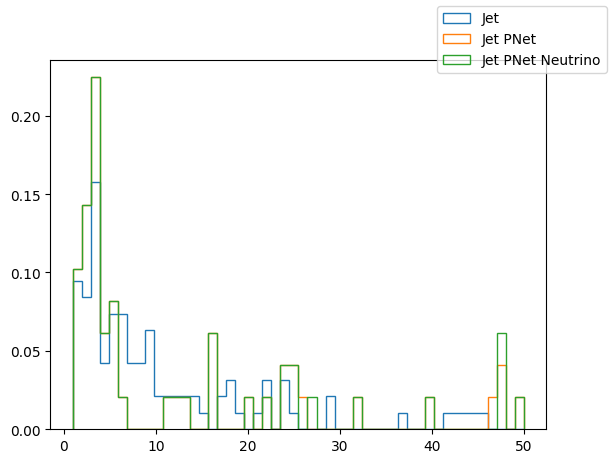

In [18]:
fig, ax = plt.subplots()
plt.hist(ak.flatten(JetMatched.pt), bins=50, range=(1, 50), histtype='step', label='Jet', density=True)
plt.hist(ak.flatten(JetMatched.ptPNet), bins=50, range=(1, 50), histtype='step', label='Jet PNet', density=True)
plt.hist(ak.flatten(JetMatched.ptPNetNeutrino), bins=50, range=(1, 50), histtype='step', label='Jet PNet Neutrino', density=True)

fig.legend()

/work/mmalucch/micromamba/envs/pocket-coffea/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/tmp/ipykernel_36414/1163215754.py:11: RuntimeWarning: invalid value encountered in divide
  ax2.plot(pt_reg_neutrino[1][:-1], pt_reg_neutrino[0]/pt_reg[0], 'o', label='Jet PNet Neutrino/Jet PNet')


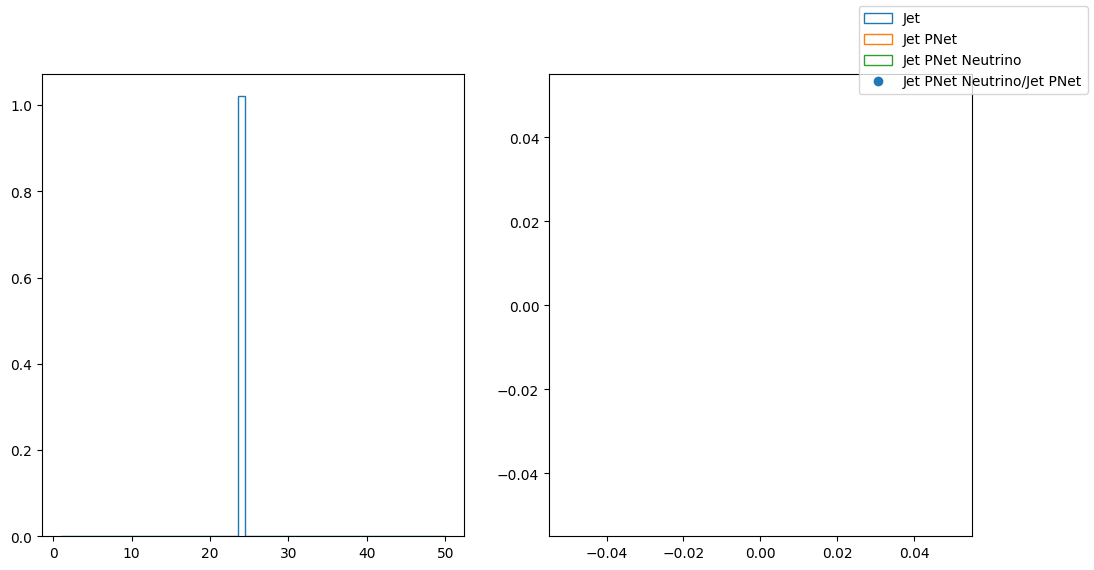

In [19]:
mask_bin=(GenJetMatched.pt>17) & (GenJetMatched.pt<20) &(GenJetMatched.eta>-3.5) & (GenJetMatched.eta<-3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(ak.flatten(JetMatched.pt[mask_bin]), bins=50, range=(1, 50), histtype='step', label='Jet', density=True)
ax1.hist(ak.flatten(JetMatched.ptPNet[mask_bin]), bins=50, range=(1, 50), histtype='step', label='Jet PNet', density=True)
ax1.hist(ak.flatten(JetMatched.ptPNetNeutrino[mask_bin]), bins=50, range=(1, 50), histtype='step', label='Jet PNet Neutrino', density=True)

pt_reg_neutrino=np.histogram(ak.to_numpy(ak.flatten(JetMatched.ptPNetNeutrino[mask_bin]), allow_missing=True),   bins=50, range=(1, 50))
pt_reg=np.histogram(ak.to_numpy(ak.flatten(JetMatched.ptPNet[mask_bin]), allow_missing=True),   bins=50, range=(1, 50))
# plot ratio
ax2.plot(pt_reg_neutrino[1][:-1], pt_reg_neutrino[0]/pt_reg[0], 'o', label='Jet PNet Neutrino/Jet PNet')
fig.legend()
